In [15]:
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import os
import pathlib

import scipy.stats as ss
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
#from mlxtend.plotting import plot_learning_curves
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score

## Load LGBM

In [7]:
bst = lgb.Booster(model_file='lgbm_model_balanced_features.txt')

In [12]:
bst1 = lgb.Booster(model_file='lgbm_model_all_features.txt')

## Our dataframe

In [16]:
df = pd.read_csv('ES.csv')

C:\Users\01jav\.conda\envs\JAVIER\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [18]:
df.head()

,weight,Finished,B2,B4,B15_1,B15_2,B15_3,B15_4,B15_5,B15_6,...,E4.3,E4.4,E4.5,E4.6,E4.7,E4.NA,E2.1,E2.2,E2.3,E2.NA
0,25713.672710,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
1,5510.332775,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
2,7777.935849,1,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,1
3,19921.024079,1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,1,0,0,0
4,8157.729363,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0


In [17]:
df.shape

(630020, 164)

## Filtering our dataframe

In [29]:
df_ok = df[(df.B15_2==0) | (df.B15_2==1)]
df_ok = df_ok[df_ok['B8.3']==0]
df_ok = df_ok[df_ok['B8.NA']==0]

In [41]:
# just checking that is ok
df_ok.date

474898    2021-05-20
474903    2021-05-20
474915    2021-05-20
474935    2021-05-20
474939    2021-05-20
             ...    
629990    2021-08-09
629993    2021-08-09
629996    2021-08-09
630007    2021-08-09
630015    2021-08-09
Name: date, Length: 19013, dtype: object

## Pre-processing our dataframe

In [87]:
index = df_ok['E3.1'].index
list_sex=[]
for i in range(len(index)):
    if (df_ok['E3.1'][index[i]]==1):
        list_sex.append('male')
    else:
        list_sex.append('female')
df_ok['Gender']=list_sex  

In [105]:
list_cough = []
for i in range(len(df_ok.index)):
    if (df_ok['B1_2.1'][df_ok.index[i]]==0 and (df_ok['B1_2.NA'][df_ok.index[i]]==1)):
        list_cough.append('None')
    elif (df_ok['B1_2.1'][df_ok.index[i]]==1 and (df_ok['B1_2.NA'][df_ok.index[i]]==0)):
        list_cough.append(1)
    else:
        list_cough.append(0)
df_ok['Cough']=list_cough

In [110]:
list_fever = []
for i in range(len(df_ok.index)):
    if (df_ok['B1_1.1'][df_ok.index[i]]==0 and (df_ok['B1_1.NA'][df_ok.index[i]]==1)):
        list_fever.append('None')
    elif (df_ok['B1_1.1'][df_ok.index[i]]==1 and (df_ok['B1_1.NA'][df_ok.index[i]]==0)):
        list_fever.append(1)
    else:
        list_fever.append(0)
df_ok['Fever']=list_fever

In [112]:
list_sof = []
for i in range(len(df_ok.index)):
    if (df_ok['B1_3.1'][df_ok.index[i]]==0 and (df_ok['B1_3.NA'][df_ok.index[i]]==1)):
        list_sof.append('None')
    elif (df_ok['B1_3.1'][df_ok.index[i]]==1 and (df_ok['B1_3.NA'][df_ok.index[i]]==0)):
        list_sof.append(1)
    else:
        list_sof.append(0)
df_ok['Shortness_of_breath']=list_sof

In [114]:
list_st = []
for i in range(len(df_ok.index)):
    if (df_ok['B1_7.1'][df_ok.index[i]]==0 and (df_ok['B1_7.NA'][df_ok.index[i]]==1)):
        list_st.append('None')
    elif (df_ok['B1_7.1'][df_ok.index[i]]==1 and (df_ok['B1_7.NA'][df_ok.index[i]]==0)):
        list_st.append(1)
    else:
        list_st.append(0)
df_ok['Sore_throat']=list_st

In [116]:
list_ha = []
for i in range(len(df_ok.index)):
    if (df_ok['B1_12.1'][df_ok.index[i]]==0 and (df_ok['B1_12.NA'][df_ok.index[i]]==1)):
        list_ha.append('None')
    elif (df_ok['B1_12.1'][df_ok.index[i]]==1 and (df_ok['B1_12.NA'][df_ok.index[i]]==0)):
        list_ha.append(1)
    else:
        list_ha.append(0)
df_ok['head_ache']=list_ha

In [118]:
list_age = []
for i in range(len(df_ok.index)):
    if (df_ok['E4.NA'][df_ok.index[i]]==1):
        list_age.append('None')
    elif (df_ok['E4.1'][df_ok.index[i]]==1 or (df_ok['E4.2'][df_ok.index[i]]==1) or (df_ok['E4.3'][df_ok.index[i]]==1) or (df_ok['E4.4'][df_ok.index[i]]==1) and (df_ok['E4.NA'][df_ok.index[i]]==0)):
        list_age.append(0)
    else:
        list_age.append(1)
df_ok['age_60_and_above']=list_age

In [127]:
list_other = []
for i in range(len(df_ok.index)):
    if (df_ok['B15_5'][df_ok.index[i]]==1):
        list_other.append('Abroad')
    elif (df_ok['B15_2'][df_ok.index[i]]==1):
        list_other.append('Contact with confirmed')
    else:
        list_other.append('Other')
df_ok['Test_indication']=list_other

In [130]:
df_ok.columns.values

array(['weight', 'Finished', 'B2', 'B4', 'B15_1', 'B15_2', 'B15_3',
       'B15_4', 'B15_5', 'B15_6', 'B15_7', 'E5', 'RecordedDate', 'ISO_3',
       'country_agg', 'region_agg', 'date_from_file', 'date', 'ISO2',
       'age', 'B0.1', 'B0.2', 'B0.NA', 'B1_1.1', 'B1_1.2', 'B1_1.NA',
       'B1_2.1', 'B1_2.2', 'B1_2.NA', 'B1_3.1', 'B1_3.2', 'B1_3.NA',
       'B1_4.1', 'B1_4.2', 'B1_4.NA', 'B1_5.1', 'B1_5.2', 'B1_5.NA',
       'B1_6.1', 'B1_6.2', 'B1_6.NA', 'B1_7.1', 'B1_7.2', 'B1_7.NA',
       'B1_8.1', 'B1_8.2', 'B1_8.NA', 'B1_9.1', 'B1_9.2', 'B1_9.NA',
       'B1_10.1', 'B1_10.2', 'B1_10.NA', 'B1_11.1', 'B1_11.2', 'B1_11.NA',
       'B1_12.1', 'B1_12.2', 'B1_12.NA', 'B1_13.1', 'B1_13.2', 'B1_13.NA',
       'B1_14.1', 'B1_14.2', 'B1_14.NA', 'B3.1', 'B3.2', 'B3.NA', 'B5.1',
       'B5.2', 'B5.NA', 'B6.1', 'B6.2', 'B6.NA', 'B7.1', 'B7.2', 'B7.NA',
       'B8.1', 'B8.2', 'B8.3', 'B8.NA', 'C0_1.1', 'C0_1.2', 'C0_1.NA',
       'C0_2.1', 'C0_2.2', 'C0_2.NA', 'C0_3.1', 'C0_3.2', 'C0_3.NA',
    

## Making predictions

In [131]:
X_test = df_ok[['age_60_and_above','Gender','Cough','Shortness_of_breath','Fever','Sore_throat','head_ache','Test_indication']]
Y_test = df_ok['B8.1']

In [133]:
y_pred = bst1.predict(X_test)

ValueError: DataFrame.dtypes for data must be int, float or bool.
Did not expect the data types in the following fields: age_60_and_above, Gender, Cough, Shortness_of_breath, Fever, Sore_throat, head_ache, Test_indication

In [47]:
print(y_pred)

[0.1358527  0.17850316 0.14351437 ... 0.1358527  0.1634217  0.1358527 ]


In [48]:
print(Y_test)

474898    0
474903    0
474915    0
474935    1
474939    0
         ..
629990    0
629993    0
629996    0
630007    0
630015    0
Name: B8.1, Length: 19013, dtype: int64


In [51]:
list_pred=[]
for i in range(len(y_pred)):
    if y_pred[i]>= 0.5:
        list_pred.append(1)
    else:
        list_pred.append(0)

In [53]:
print(max(y_pred))

0.3200865935894897


In [52]:
print(list_pred)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Accuracy Score: 0.8941250723189397
Area Under Curve: 0.5
Recall score: 0.0

Specificity: 1.0
F1 score: 0.0


C:\Users\01jav\.conda\envs\JAVIER\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\01jav\.conda\envs\JAVIER\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\01jav\.conda\envs\JAVIER\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\01jav\.conda\envs\JAVIER\lib\site-packag

Precision score: 0.0
[[17000     0]
 [ 2013     0]]

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     17000
           1       0.00      0.00      0.00      2013

    accuracy                           0.89     19013
   macro avg       0.45      0.50      0.47     19013
weighted avg       0.80      0.89      0.84     19013



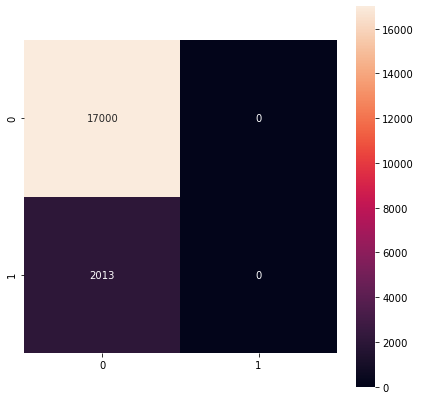

In [59]:
print(f'Accuracy Score: {accuracy_score(Y_test,list_pred)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, list_pred)}')
print(f'Recall score: {recall_score(Y_test,list_pred)}')
print("")
matrix = confusion_matrix(Y_test, list_pred)
tn, fp, fn, tp = confusion_matrix(Y_test, list_pred).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,list_pred)}')
print(f'Precision score: {precision_score(Y_test,list_pred)}')
print(matrix)
print("")
print(classification_report(Y_test, list_pred))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

In [61]:
df_is = pd.read_csv('corona_tested_individuals_ver_006.english.csv')

C:\Users\01jav\.conda\envs\JAVIER\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (1,2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [72]:
df_ok.head()

,weight,Finished,B2,B4,B15_1,B15_2,B15_3,B15_4,B15_5,B15_6,...,E4.3,E4.4,E4.5,E4.6,E4.7,E4.NA,E2.1,E2.2,E2.3,E2.NA
474898,53897.360420,1,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,0
474903,20890.862300,1,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
474915,16391.377642,1,4.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0
474935,16260.040091,0,90.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,1,0,0
474939,13555.851851,1,365.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,0


In [74]:
df_ok['B15_2'].unique()

array([0., 1.])

In [129]:
df_ok.columns.values

array(['weight', 'Finished', 'B2', 'B4', 'B15_1', 'B15_2', 'B15_3',
       'B15_4', 'B15_5', 'B15_6', 'B15_7', 'E5', 'RecordedDate', 'ISO_3',
       'country_agg', 'region_agg', 'date_from_file', 'date', 'ISO2',
       'age', 'B0.1', 'B0.2', 'B0.NA', 'B1_1.1', 'B1_1.2', 'B1_1.NA',
       'B1_2.1', 'B1_2.2', 'B1_2.NA', 'B1_3.1', 'B1_3.2', 'B1_3.NA',
       'B1_4.1', 'B1_4.2', 'B1_4.NA', 'B1_5.1', 'B1_5.2', 'B1_5.NA',
       'B1_6.1', 'B1_6.2', 'B1_6.NA', 'B1_7.1', 'B1_7.2', 'B1_7.NA',
       'B1_8.1', 'B1_8.2', 'B1_8.NA', 'B1_9.1', 'B1_9.2', 'B1_9.NA',
       'B1_10.1', 'B1_10.2', 'B1_10.NA', 'B1_11.1', 'B1_11.2', 'B1_11.NA',
       'B1_12.1', 'B1_12.2', 'B1_12.NA', 'B1_13.1', 'B1_13.2', 'B1_13.NA',
       'B1_14.1', 'B1_14.2', 'B1_14.NA', 'B3.1', 'B3.2', 'B3.NA', 'B5.1',
       'B5.2', 'B5.NA', 'B6.1', 'B6.2', 'B6.NA', 'B7.1', 'B7.2', 'B7.NA',
       'B8.1', 'B8.2', 'B8.3', 'B8.NA', 'C0_1.1', 'C0_1.2', 'C0_1.NA',
       'C0_2.1', 'C0_2.2', 'C0_2.NA', 'C0_3.1', 'C0_3.2', 'C0_3.NA',
    

In [62]:
df_is.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,negative,None,female,Other
1,2020-04-30,1,0,0,0,0,negative,None,female,Other
2,2020-04-30,0,1,0,0,0,negative,None,male,Other
3,2020-04-30,1,0,0,0,0,negative,None,female,Other
4,2020-04-30,1,0,0,0,0,negative,None,male,Other


In [64]:
df_is['cough'].unique()

array([0, 1, '0', '1', 'None'], dtype=object)

In [65]:
df_is['fever'].unique()

array([0, 1, '0', '1', 'None'], dtype=object)

In [66]:
df_is['sore_throat'].unique()

array([0, 1, '0', '1', 'None'], dtype=object)

In [67]:
df_is['shortness_of_breath'].unique()

array([0, 1, '0', '1', 'None'], dtype=object)

In [68]:
df_is['head_ache'].unique()

array([0, 1, '0', '1', 'None'], dtype=object)

In [69]:
df_is['corona_result'].unique()

array(['negative', 'positive', 'other'], dtype=object)

In [63]:
df_is['age_60_and_above'].unique()

array(['None', 'Yes', 'No'], dtype=object)

In [70]:
df_is['gender'].unique()

array(['female', 'male', 'None'], dtype=object)

In [71]:
df_is['test_indication'].unique()

array(['Other', 'Abroad', 'Contact with confirmed'], dtype=object)